In [28]:
import wotan
from wotan import flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import yscale
import lightkurve as lk
from altaipony.flarelc import FlareLightCurve
from lightkurve.lightcurvefile import TessLightCurveFile
from lightkurve.lightcurve import TessLightCurve
from altaipony.ffd import FFD
from astropy.timeseries import LombScargle
import altaipony

In [3]:
lc_df = pd.read_csv('C:/Users/60002/Documents/GitHub/sunnyhills/data/current/tess_lightcurves/TIC 12509218.CSV')
ls_df = lc_df[['time', 'flux', 'flux_err']]

ls_df = ls_df.dropna()

raw_times = np.array(ls_df['time'])
raw_fluxes = np.array(ls_df['flux'])
raw_flux_errs = np.array(ls_df['flux_err'])
    
light_curve = lk.LightCurve(time=raw_times, flux=raw_fluxes, flux_err=raw_flux_errs)
light_curve = light_curve.remove_outliers(sigma=3).normalize()

times = np.array(light_curve.time.value)
fluxes = np.array(light_curve.flux.value)
flux_errs = np.array(light_curve.flux_err)

In [5]:
%matplotlib inline

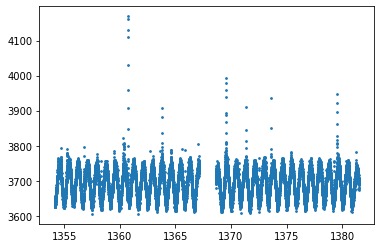

In [8]:

plt.scatter(raw_times,raw_fluxes,s=3)

In [23]:
flatten_lc, trend_lc = flatten(
raw_times,             
raw_fluxes,                
method='biweight',
window_length=.1,    
break_tolerance=0.5,  
return_trend=True,   
)

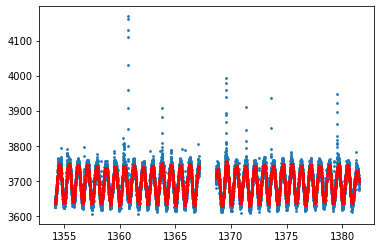

In [26]:
plt.scatter(raw_times,raw_fluxes,s=3)
plt.scatter(raw_times, trend_lc,s=3,c="red")

In [140]:
detrend_flc = FlareLightCurve(raw_times,trend_lc)
raw_flc = FlareLightCurve(raw_times,raw_fluxes,raw_flux_errs)


C:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\lightcurve.py:226: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux'>

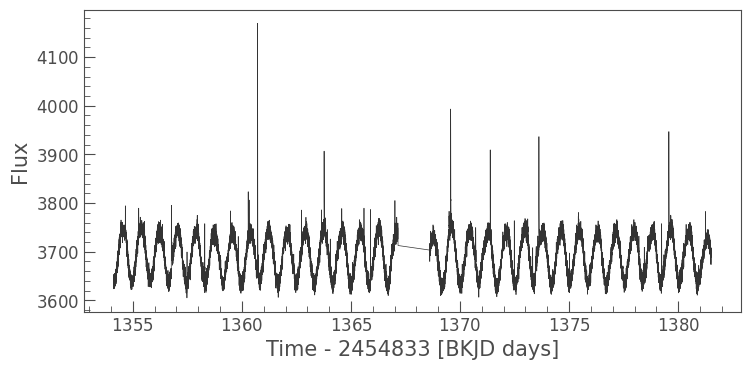

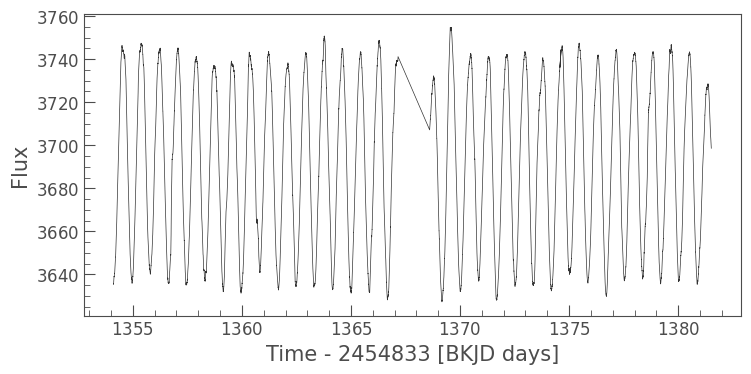

In [141]:
raw_flc.plot()
detrend_flc.plot()

In [142]:
def detrend_biweight(lc):
    flatten_lc, trend_lc = flatten(
    lc.time.value,             
    lc.flux.value,                
    method='biweight',
    window_length=.1,    
    break_tolerance=0.5,  
    return_trend=True,   
    )
    detrended_lc = FlareLightCurve(lc.time.value, lc.flux.value)
    detrended_lc['detrended_flux']= trend_lc
    detrended_lc['detrended_flux_err']  = lc.flux_err
    return detrended_lc

In [143]:
print(callable(detrend_biweight))
detrend = detrend_biweight(raw_flc)
flc = raw_flc.detrend("custom",func=detrend_biweight)#,detrend_biweight)

True


C:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\lightcurve.py:226: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,
C:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\lightcurve.py:226: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


In [153]:
flare_data = flc.find_flares()
flare_data.flares

Found 16 candidate(s) in the (0,9226) gap.
Found 16 candidate(s) in the (9226,18300) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,210,427,NaN,NaN,1354.406071,1354.707469,312.707510,4.327115,0.014143,0.301398,18300.0
1,809,1025,NaN,NaN,1355.239428,1355.543603,326.187570,4.388164,0.014430,0.304175,18300.0
2,1414,1599,NaN,NaN,1356.085283,1356.357512,274.549262,4.248902,0.013806,0.272229,18300.0
3,2001,2197,NaN,NaN,1356.926970,1357.200588,269.418544,4.120217,0.013837,0.273618,18300.0
4,2597,2784,NaN,NaN,1357.761712,1358.028384,250.450574,4.128929,0.012768,0.266673,18300.0
5,3195,3374,NaN,NaN,1358.600619,1358.864513,237.012997,4.215374,0.011644,0.263894,18300.0
6,3782,3959,NaN,NaN,1359.446469,1359.692308,229.276807,3.955270,0.012173,0.245838,18300.0
7,4373,4564,NaN,NaN,1360.267319,1360.536768,261.499513,4.174976,0.013306,0.269450,18300.0
8,4972,5155,NaN,NaN,1361.109001,1361.379839,259.415960,4.272560,0.013393,0.270838,18300.0
9,5561,5739,NaN,NaN,1361.963182,1362.210409,221.929023,3.958478,0.011955,0.247226,18300.0
